In [30]:
# Data processing 
import numpy as np
import pandas as pd

# Data vizualisation
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes',  labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Models
import sklearn

# Commons
import os
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

In [31]:
data = pd.read_csv('../input/brain_tumor/data.csv')

In [32]:
data.shape

(36, 7466)

In [33]:
data.head()

,Unnamed: 0,X53416,M83670,X90908,M97496,X90908.1,U37019,R48602,T96548,X64559,...,H87456,R64130,H11125.1,U22055,L22524,M13699.1,X54489,T55008,M10065.2,y
0,0,70,-81,25,10,22,113,36,163,9,...,75,5,68,138,53,-4,123,2,19,tumor
1,1,108,-30,-7,60,0,24,8,113,-3,...,186,6,60,93,140,-3,271,-1,-51,tumor
2,2,75,-1,5,48,6,34,27,35,-1,...,186,225,94,62,39,-14,127,7,192,tumor
3,3,871,4,14,78,-6,85,65,227,19,...,77,6,78,30,87,-4,59,3,367,tumor
4,4,-92,-34,14,19,11,-6,27,-8,9,...,87,303,204,81,105,9,265,-2,126,tumor


In [34]:
data.columns

Index(['Unnamed: 0', 'X53416', 'M83670', 'X90908', 'M97496', 'X90908.1',
       'U37019', 'R48602', 'T96548', 'X64559',
       ...
       'H87456', 'R64130', 'H11125.1', 'U22055', 'L22524', 'M13699.1',
       'X54489', 'T55008', 'M10065.2', 'y'],
      dtype='object', length=7466)

In [35]:
data.drop(data.columns[[0]], axis=1, inplace=True)

In [36]:
data.head()

,X53416,M83670,X90908,M97496,X90908.1,U37019,R48602,T96548,X64559,T55741,...,H87456,R64130,H11125.1,U22055,L22524,M13699.1,X54489,T55008,M10065.2,y
0,70,-81,25,10,22,113,36,163,9,25,...,75,5,68,138,53,-4,123,2,19,tumor
1,108,-30,-7,60,0,24,8,113,-3,9,...,186,6,60,93,140,-3,271,-1,-51,tumor
2,75,-1,5,48,6,34,27,35,-1,4,...,186,225,94,62,39,-14,127,7,192,tumor
3,871,4,14,78,-6,85,65,227,19,22,...,77,6,78,30,87,-4,59,3,367,tumor
4,-92,-34,14,19,11,-6,27,-8,9,-5,...,87,303,204,81,105,9,265,-2,126,tumor


In [37]:
# No missing values
sum(data.isna().sum())

0

In [38]:
# Count unique labels
# The dataset is very small, but it has a lot of features
data['y'].value_counts()

Normal    18
tumor     18
Name: y, dtype: int64

In [46]:
y = data['y']
y = np.asarray(y)
data.drop(columns=['y'], inplace=True)

In [47]:
data.shape

(36, 7464)

In [48]:
data.head()

,X53416,M83670,X90908,M97496,X90908.1,U37019,R48602,T96548,X64559,T55741,...,D14657,H87456,R64130,H11125.1,U22055,L22524,M13699.1,X54489,T55008,M10065.2
0,70,-81,25,10,22,113,36,163,9,25,...,44,75,5,68,138,53,-4,123,2,19
1,108,-30,-7,60,0,24,8,113,-3,9,...,110,186,6,60,93,140,-3,271,-1,-51
2,75,-1,5,48,6,34,27,35,-1,4,...,98,186,225,94,62,39,-14,127,7,192
3,871,4,14,78,-6,85,65,227,19,22,...,54,77,6,78,30,87,-4,59,3,367
4,-92,-34,14,19,11,-6,27,-8,9,-5,...,142,87,303,204,81,105,9,265,-2,126


In [49]:
y.shape

(36,)

In [50]:
# Let's split the dataset
from sklearn.model_selection import train_test_split

train_df, test_df, y_train, y_test = train_test_split(data, y, test_size=0.2)

In [51]:
train_df.shape

(28, 7464)

In [53]:
y_train.shape

(28,)

In [52]:
test_df.shape

(8, 7464)

In [54]:
y_test.shape

(8,)

In [56]:
attrs = []
for attr in train_df.columns:
    attrs.append(attr)

In [60]:
# Let's create a preprocessing pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipe = Pipeline([
    ('scaler', StandardScaler()),
])

transformer = ColumnTransformer([
    ('num', pipe, attrs),
])

In [61]:
transformer

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['X53416', 'M83670', 'X90908', 'M97496',
                                  'X90908.1', 'U37019', 'R48602', 'T96548',
                                  'X64559', 'T55741', 'T64171', 'T54547',
                                  'M95936', 'X54162', 'H57136', 'M10373',
                                  'T55200', 'T46924', 'L11708', 'M18079',
                                  'T46933', 'M98331', 'H54425', 'M76378',
                                  'M26393', 'H59796', 'M82962', 'T55255',
                                  'L13773', 'X53416.1', ...])])

In [62]:
X_train = transformer.fit_transform(train_df[attrs])

In [63]:
X_train.shape

(28, 7464)

In [69]:
X_train[0]

array([-1.16152576, -0.57125   , -1.45171125, ...,  0.55857091,
       -0.40427083, -0.40206435])

In [84]:
y_train[0]

'tumor'

In [67]:
X_test = transformer.transform(test_df[attrs])

In [68]:
X_test.shape

(8, 7464)

In [92]:
# Let's convert the labels from `categorical` to `numerical` using `LabelEncoder`
from sklearn.preprocessing import LabelEncoder

label_enc = LabelEncoder()
y_train = label_enc.fit_transform(y_train)

In [93]:
# 0 = 'normal'
# 1 = 'tumor'
label_enc.classes_

array(['Normal', 'tumor'], dtype=object)

In [95]:
y_test = label_enc.fit_transform(y_test)

In [70]:
# The preprocessing part is done
# Until now, we have (X_train, y_train), (X_test, y_test)

In [104]:
def model_acc(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return [model, accuracy_score(y_test, y_pred)]

In [105]:
# We can try a base model to see how it performs
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=RANDOM_STATE)
[tree_clf, acc] = model_acc(tree_clf, X_train, y_train, X_test, y_test)
acc

0.75

In [127]:
# Predict only one instance
tree_clf.predict([X_test[0]])

array([0])

In [128]:
# Let's try a `RandomForestClassifier`
from sklearn.ensemble import RandomForestClassifier

rnd_forest = RandomForestClassifier(random_state=RANDOM_STATE)
[rnd_forest, acc] = model_acc(rnd_forest, X_train, y_train, X_test, y_test)
acc

1.0

In [131]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)
    train_errors, val_errors = [], []
    
    # Select a sized subset from the training set (1 instances, 2 instances,..., until all instances)
    for m in range(1, len(X_train) + 1):
        # Fit the model on that subset
        model.fit(X_train[:m], y_train[:m])
        
        # Predict on the training subset
        y_train_predict = model.predict(X_train[:m])
        
        # Predict on the validation subset
        y_val_predict = model.predict(X_val)
        
        # Save the train and validation errors
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    # Plot the results
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    
    plt.legend(loc="upper right", fontsize=14)
    
    plt.xlabel("Training set size", fontsize=14)
    plt.ylabel("RMSE", fontsize=14)

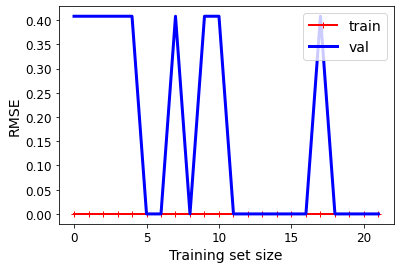

In [132]:
plot_learning_curves(rnd_forest, X_train, y_train)

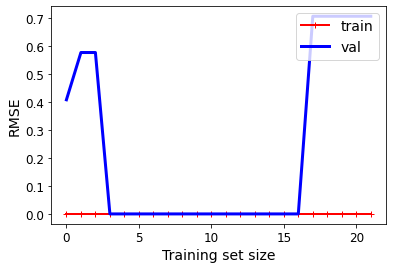

In [133]:
plot_learning_curves(tree_clf, X_train, y_train)

In [134]:
# Conclusion: The dataset is very small
# We can't make any model to generalize well